In [25]:
# 필요한 모듈 임포트

import numpy as np # 선형대수 
import pandas as pd # 데이터 프레임
%matplotlib inline 
# 그래프 쥬피터 노트북 위에 그려지게끔 
import seaborn as sns # 데이터 시각화 
import matplotlib.pyplot as plt # 데이터 시각화 

    데이터 출처 : https://rt.molit.go.kr
    기간 : 2011년 01월 01일 ~ 2020년 12월 31일
    범위 : 서울시 아파트 계약일을 기준으로 한 아파트 매매 거래 금액 

In [26]:
apart11 = pd.read_csv("/Users/ds/2011아파트실거래가.csv", encoding='CP949')
apart12 = pd.read_csv("/Users/ds/2012아파트실거래가.csv", encoding='CP949')
apart13 = pd.read_csv("/Users/ds/2013아파트실거래가.csv", encoding='CP949')
apart14 = pd.read_csv("/Users/ds/2014아파트실거래가.csv", encoding='CP949')
apart15 = pd.read_csv("/Users/ds/2015아파트실거래가.csv", encoding='CP949')
apart16 = pd.read_csv("/Users/ds/2016아파트실거래가.csv", encoding='CP949')
apart17 = pd.read_csv("/Users/ds/2017아파트실거래가.csv", encoding='CP949')
apart18 = pd.read_csv("/Users/ds/2018아파트실거래가.csv", encoding='CP949')
apart19 = pd.read_csv("/Users/ds/2019아파트실거래가.csv", encoding='CP949')
apart20 = pd.read_csv("/Users/ds/2020아파트실거래가.csv", encoding='CP949')
apart21 = pd.read_csv("/Users/ds/2021아파트실거래가.csv", encoding='CP949')

In [27]:
apart=pd.concat([apart11,apart12,apart13,apart14,apart15,apart16,apart17,apart18,apart19,apart20,apart21])

In [28]:
apart.head(3)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201107,9,"64,000",3,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201107,28,"65,500",5,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,67.28,201101,19,"70,500",3,1987,언주로 3,NaN


In [29]:
apart["거래금액(만원)"]=apart["거래금액(만원)"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
apart["거래금액(만원)"]=apart["거래금액(만원)"].astype("int")

In [30]:
apart["거래금액(만원)/전용면적(㎡)"]=apart["거래금액(만원)"]/apart["전용면적(㎡)"]

In [31]:
monthly=[]
for year in range(11,22):
    for month in range(1,13):
        if month<10:
            date="20"+str(year)+"0"+str(month)
        else:
            date="20"+str(year)+str(month)
        monthly.append(int(date))
        

In [32]:
monthly=monthly[:-4]

In [33]:
med=[]
for month in monthly:
    med.append(apart[apart["계약년월"]==month]["거래금액(만원)/전용면적(㎡)"].mean())

In [34]:
med

[608.7841927691667,
 581.5683196586688,
 564.974868145205,
 574.5133452686216,
 575.6922277341642,
 575.3611114311899,
 613.224933230857,
 566.8193432133838,
 573.8600996540333,
 588.3505444183428,
 588.0452826473941,
 610.7135342351196,
 573.6255494012421,
 569.1176206572202,
 566.1766144769748,
 583.9410853724011,
 591.5422206514403,
 557.0746589345381,
 563.9533760597108,
 547.012210474978,
 568.8582013548504,
 571.6886239277668,
 579.4106203616366,
 586.9607430214454,
 588.1568022429786,
 590.1856218562634,
 571.1758282351808,
 575.2972037929856,
 564.0427732743661,
 552.6705000399941,
 522.6383747212739,
 537.9871619855489,
 544.8439432240117,
 556.0317304603482,
 573.9097665572318,
 604.429768806683,
 594.5134049529677,
 593.2576683920282,
 555.4334617689582,
 563.7739997909825,
 565.5992443814758,
 573.1270822492731,
 583.6445324852311,
 590.800611200385,
 586.2678581284594,
 587.3295401213556,
 573.4118239739776,
 601.6979219540723,
 593.1403309796176,
 593.6941845983171,
 594.

In [35]:
monthlyMed=pd.DataFrame([monthly,med]).T

In [36]:
monthlyMed.columns=["계약년월","거래금액(만원)/전용면적(㎡)"]

In [37]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡)
0,201101.0,608.784193
1,201102.0,581.568320
2,201103.0,564.974868
3,201104.0,574.513345
4,201105.0,575.692228
...,...,...
123,202104.0,1364.642214
124,202105.0,1339.730926
125,202106.0,1325.764187
126,202107.0,1382.142506


In [38]:
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("int")
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("str")

In [39]:
monthlyMed["계약년도"]=monthlyMed["계약년월"].str[:4]
monthlyMed["계약당월"]=monthlyMed["계약년월"].str[-2:]

In [40]:
monthlyMed["계약날짜"]=monthlyMed["계약년도"]+'-'+monthlyMed["계약당월"]+'-15'

In [41]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [42]:
import datetime
monthlyMed["계약날짜"]=pd.to_datetime(monthlyMed["계약날짜"])

In [43]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [44]:
timeSeries_medv=monthlyMed[["계약날짜","거래금액(만원)/전용면적(㎡)"]]

In [46]:
timeSeries_medv.to_csv("medv2011to2021",header=True,index=False)

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heejinkim/miniforge3/lib/python3.9/site-packages/matp

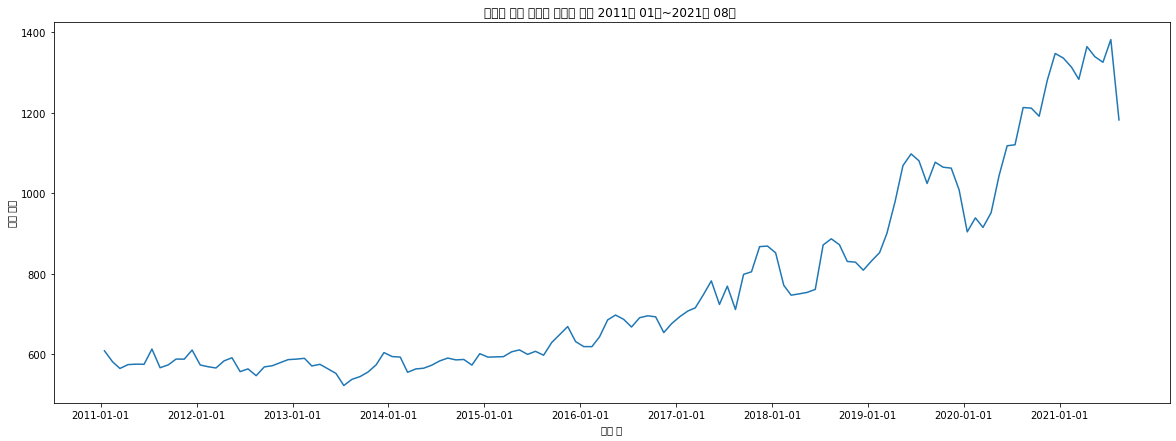

In [22]:
plt.figure(figsize=(20,7)) ## 크기 조절

plt.plot(timeSeries_medv["계약날짜"],timeSeries_medv["거래금액(만원)/전용면적(㎡)"]) ## 내용 설정

plt.title('서울시 평균 아파트 매매가 추이 2011년 01월~2021년 08월 ')  ## 타이틀
plt.xlabel('기준 월')  ## x축
plt.ylabel('평당 가격')  ## y축

plt.xticks(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
## x축 감격 설정

plt.show()

In [181]:
df = pd.read_excel('/Users/ds/가계대출.xlsx')

In [186]:
df1=df.iloc[9:,:]

In [190]:
df1

,* 통계표명 :,가계대출,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161
9,지 역,2007년 12월,2008년 01월,2008년 02월,2008년 03월,2008년 04월,2008년 05월,2008년 06월,2008년 07월,2008년 08월,...,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월
10,전국,474094.4,473606.9,476919.4,480414.6,485302.9,489620.6,494953.7,498816.4,502479.5,...,1116049.9,1128096.9,1138181.0,1149710.3,1166027.4,1173695.4,1181802.1,1190056.7,1197922.8,1216813.4
11,서울,163372.6,163223.8,164072.1,165192.6,166904.7,168457.5,170209.7,171704.7,172891.6,...,340297.2,345570.0,350203.9,355160.8,361190.4,363817.0,368505.5,371717.3,375179.8,385299.8
12,부산,26595.1,26526.2,26636.7,26832.2,27040.7,27082.5,27236.6,27305.1,27461.5,...,67220.9,67947.4,68855.0,69737.4,71248.1,72024.8,72663.7,73244.7,73613.9,74244.0
13,대구,18981.0,18836.2,18908.2,18978.6,19052.7,19012.4,19226.8,19259.0,19284.7,...,44820.0,45136.6,45596.5,46201.3,47258.3,47361.7,47956.8,48372.2,48740.5,49571.0
14,인천,25643.0,25782.5,26048.7,26074.9,26231.8,26498.3,26809.8,26973.0,27189.2,...,59858.1,60649.8,61012.3,61473.1,62169.7,62560.3,63088.1,63321.8,63670.7,64176.1
15,광주,10409.6,10325.0,10419.9,10539.3,10735.1,10840.9,11019.5,11160.1,11220.8,...,26916.5,27055.8,27302.2,27518.6,28047.9,28222.0,28457.2,28641.0,28777.4,29200.4
16,대전,11987.2,11883.4,11984.1,12015.3,12099.8,12151.2,12278.3,12301.3,12337.6,...,27098.1,27265.1,27535.4,27889.5,28284.3,28404.2,28550.8,28794.2,28834.1,29218.0
17,울산,8635.1,8622.3,8738.0,8806.2,8883.6,9049.4,9181.9,9286.8,9292.8,...,21524.5,21606.2,21667.1,21840.3,22071.0,22112.8,22147.3,22305.2,22317.5,22522.9
18,세종,-,-,-,-,-,-,-,-,-,...,8120.5,8200.7,8241.3,8347.7,8407.1,8411.6,8416.3,8509.9,8537.1,8492.8


In [194]:
df1.columns(df.iloc[9:10,:])

TypeError: 'Index' object is not callable

In [191]:
df.iloc[9:10,:]

,* 통계표명 :,가계대출,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161
9,지 역,2007년 12월,2008년 01월,2008년 02월,2008년 03월,2008년 04월,2008년 05월,2008년 06월,2008년 07월,2008년 08월,...,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월
